In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import requests
import numpy as np
from keys import *
from matplotlib.ticker import FormatStrFormatter

In [2]:
df= pd.read_csv('./data_files/channel.csv')

In [3]:
df.head()

,platform,channel_id,channel_name,followers_gain,last_streamed_game,channel_country,stream_language,partnership_status,channel_type
0,twitch,36029255,riotgames,84069,League of Legends,NaN,en,partner,Organization
1,twitch,181077473,gaules,18254,Counter-Strike: Global Offensive,BR,pt,partner,Male
2,twitch,31239503,esl_csgo,27679,Counter-Strike: Global Offensive,NaN,en,partner,Organization
3,twitch,52130765,squeezie,170230,Special Events,FR,fr,partner,Male
4,twitch,156037856,fextralife,46950,Overwatch 2,NaN,en,partner,Organization


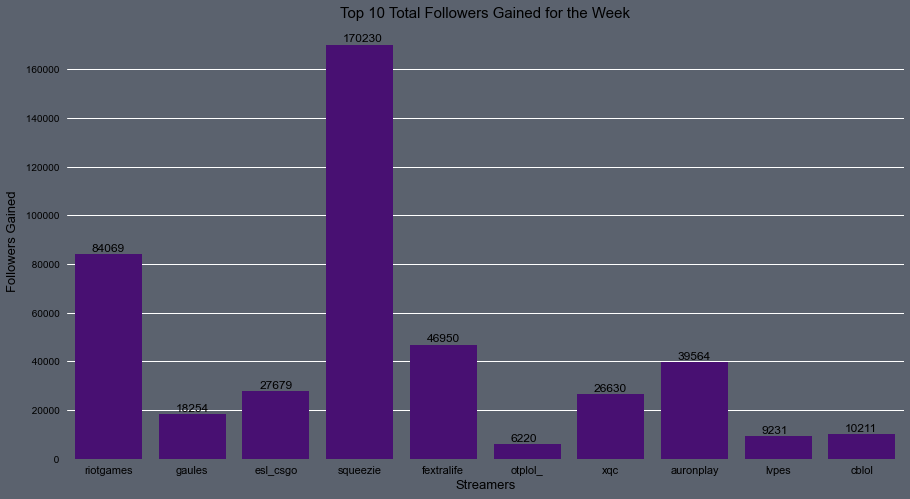

In [4]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(15,8))
fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')

ax =  sns.barplot(ax= ax, data= df[:10], x='channel_name', y='followers_gain', color='indigo')
plt.title('Top 10 Total Followers Gained for the Week', fontsize=15, color='black')
plt.xlabel('Streamers', fontsize=13, color='black')
plt.ylabel('Followers Gained', fontsize=13,color='black')
plt.xticks(color='black',fontsize=11)
plt.yticks(color='black')
ax.yaxis.set_major_formatter(FormatStrFormatter('% .0f'))
for i , g in enumerate(df['followers_gain'][:10]):
    plt.text(i-.20, g+1000, f'{np.round(g)}',fontsize=12, color='black')



In [5]:
df.dropna(axis=1,inplace=True)

In [6]:
df

,platform,channel_id,channel_name,followers_gain,last_streamed_game,stream_language,partnership_status
0,twitch,36029255,riotgames,84069,League of Legends,en,partner
1,twitch,181077473,gaules,18254,Counter-Strike: Global Offensive,pt,partner
2,twitch,31239503,esl_csgo,27679,Counter-Strike: Global Offensive,en,partner
3,twitch,52130765,squeezie,170230,Special Events,fr,partner
4,twitch,156037856,fextralife,46950,Overwatch 2,en,partner
...,...,...,...,...,...,...,...
95,twitch,52345220,tisischubech,6380,Special Events,de,partner
96,twitch,43683025,ohnepixel,4609,Counter-Strike: Global Offensive,en,partner
97,twitch,20992865,grubby,5385,Dota 2,en,partner
98,twitch,445529741,kyedae,18338,VALORANT,en,partner


In [7]:
pie_data = df.groupby('stream_language').count().reset_index()

In [8]:
pie_data=pie_data.sort_values(by='platform', ascending=False).reset_index()[:5]

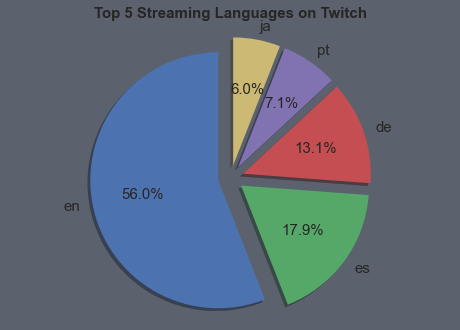

In [9]:

fig1, ax1 = plt.subplots()
fig1.set_facecolor('#5b626e')
ax1.set_facecolor('#5b626e')

plt.title('Top 5 Streaming Languages on Twitch', fontsize=15, weight='bold')
size = []
for item in pie_data['platform']:
    if item  <= 2:
        size.append(1.1)
    if item  >= 3 and item < 5:
        size.append(.5)
    elif item >= 5:
        size.append(.1)




ax1.pie(pie_data['platform'],  explode=size,labels=pie_data['stream_language'], autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 15} )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()